In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Reading datasets
#train data and test data
train=pd.read_csv('../input/titanic/train.csv')
test=pd.read_csv('../input/titanic/test.csv')

In [4]:
#Viewing data and different features
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

**Removing useless data from the data set such as 'Name','Ticket','Cabin','PassengerId'**

In [7]:
df=train.drop(['Name','Ticket','Cabin','PassengerId'], axis=1)
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [8]:
# identifying categorical and continuous variables

df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

**Categorical variables are stored as objects and continuous variables are stored as int or float therefore name, sex and ticket are categorical variables**

> **UNIVARIATE ANALYSIS OF CONTINUOS VARIABLES**

In [9]:
# using describe func on the continuos variabes ( only works for continuos variables)

df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

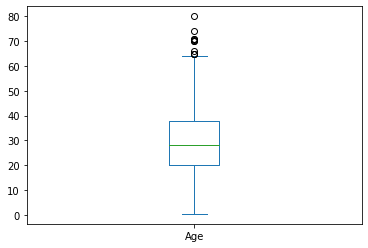

In [10]:
# plotting a boxplot of the age variable

df['Age'].plot.box()

> **UNIVARIATE ANALYSIS OF CATEGORICAL VARIABLES**

In [11]:
# creating frequence table for sex variable

df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:>

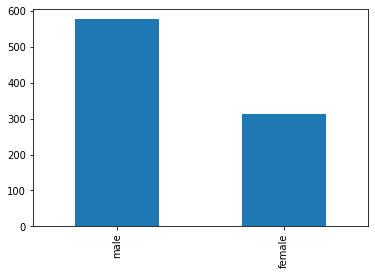

In [12]:
# creating a bar plt for the same

df['Sex'].value_counts().plot.bar()

**BIVARIATE ANALYSIS**

<AxesSubplot:xlabel='Age', ylabel='Fare'>

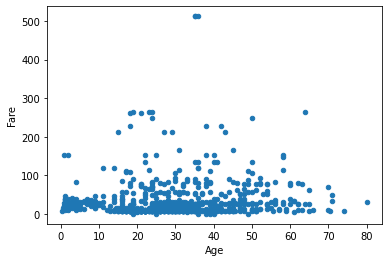

In [13]:
# using scatter plot to compare age and fare

df.plot.scatter('Age', 'Fare')

**CHECKING FOR MISSING VALUES**

In [14]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**OUTLIER TREATMENT**

<AxesSubplot:>

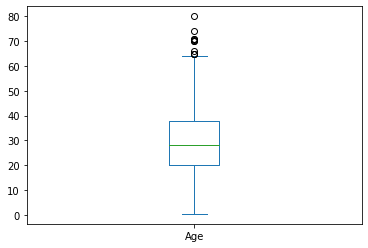

In [15]:
# UNIVARIATE OUTLIER DETECTION USING BOX PLOT

df['Age'].plot.box()

<AxesSubplot:xlabel='Age', ylabel='Fare'>

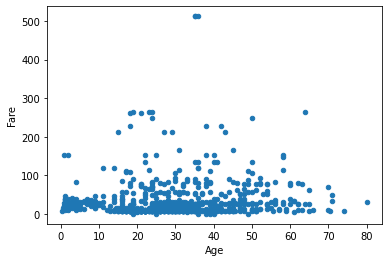

In [16]:
# BIVARIATE OUTLIER DETECTION USING SCATTER PLOT

df.plot.scatter('Age', 'Fare')

In [17]:
# Treating null values

df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Age']=df['Age'].fillna(df['Age'].mean())

In [18]:
#replacing outliers in Fare with the mean Fare value

median = float(df['Fare'].median())
df["Fare"] = np.where(df["Fare"] > 300, median, df['Fare'])



<AxesSubplot:xlabel='Age', ylabel='Fare'>

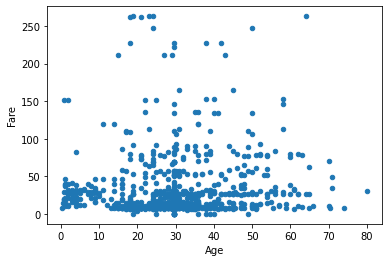

In [19]:
df.plot.scatter('Age', 'Fare')

In [20]:
# Finding the mode value of the “Embarked” column as it will have occurred the maximum number of times

print(df['Embarked'].mode())

0    S
dtype: object


In [21]:
# replacing with mode

df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [22]:
# checking again
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Encoding Categorical Data**

In [24]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df.Sex=df.Sex.map({'female':0, 'male':1})
df.Embarked=df.Embarked.map({'S':0, 'C':1, 'Q':2,'nan':'NaN'})
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,0
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,0
3,1,1,0,35.0,1,0,53.1000,0
4,0,3,1,35.0,0,0,8.0500,0


# **Splitting data into Test set & Training Set**
1.Clean and adjust data for X and y

2.Split Data in Train/Test for X and y

3.Fit/Train Scaler on Training X

4.Scale X

5.Create Model

6.Fit/Train Model on X Train

7.Evaluate Model on X Test by comparing to Y Test

8.Adjust Parameters as Necessary and repeat 6 and 7

In [25]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X=X.values

In [26]:
X

array([[3, 1, 22.0, ..., 0, 7.25, 0],
       [1, 0, 38.0, ..., 0, 71.2833, 1],
       [3, 0, 26.0, ..., 0, 7.925, 0],
       ...,
       [3, 0, 29.69911764705882, ..., 2, 23.45, 0],
       [1, 1, 26.0, ..., 0, 30.0, 1],
       [3, 1, 32.0, ..., 0, 7.75, 2]], dtype=object)

In [27]:
# Split Data in Train/Test for X and y
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [28]:
# Fit/Train Scaler on Training X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [29]:
# Scale X
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

**01. Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
classifier_logr = LogisticRegression()
classifier_logr.fit(X_train, y_train)

LogisticRegression()

In [31]:
y_pred = classifier_logr.predict(X_test)

In [32]:
# Model Performance Evaluation for Logistic Regression

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.23107821196993172

In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8134328358208955

**02. K-Nearest**

In [34]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
classifier_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
y_pred = classifier_knn.predict(X_test)

In [36]:
# Model Performance Evaluation for K Nearest

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[137  20]
 [ 32  79]]


0.8059701492537313

**03. Kernel SVM**

In [37]:
from sklearn.svm import SVC
classifier_ksvm = SVC(kernel = 'rbf', random_state = 42)
classifier_ksvm.fit(X_train, y_train)

SVC(random_state=42)

In [38]:
y_pred = classifier_ksvm.predict(X_test)

In [39]:
# Model Performance Evaluation for K SVM

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[146  11]
 [ 38  73]]


0.8171641791044776

**04. Support Vector Machine**

In [40]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'linear', random_state = 0)
classifier_svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [41]:
y_pred = classifier_svm.predict(X_test)

In [42]:
# Model Performance Evaluation for SVM

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[134  23]
 [ 33  78]]


0.7910447761194029

**05. NAIVE BAYES**

In [43]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = classifier_nb.predict(X_test)

In [45]:
# Model Performance Evaluation for Naive Bayes

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[128  29]
 [ 28  83]]


0.7873134328358209

**06. DECISION TREE**

In [46]:
from sklearn.tree import DecisionTreeClassifier
classifier_dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 21)
classifier_dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=21)

In [47]:
y_pred = classifier_dtc.predict(X_test)

In [48]:
# Model Performance Evaluation for Decision Tree

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[133  24]
 [ 41  70]]


0.7574626865671642

**TEST DATA SET**

In [49]:
df1=test

In [50]:
df1.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [51]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<AxesSubplot:xlabel='Age', ylabel='Fare'>

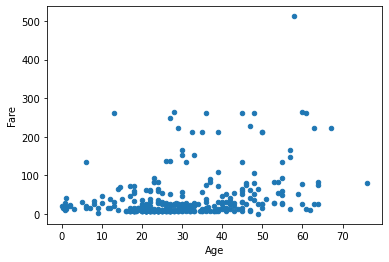

In [52]:
df1.plot.scatter('Age', 'Fare')

In [53]:
#removing fare outliers from dataset
median = float(df1['Fare'].median())
df1["Fare"] = np.where(df1["Fare"] > 300, median, df1['Fare'])




<AxesSubplot:xlabel='Age', ylabel='Fare'>

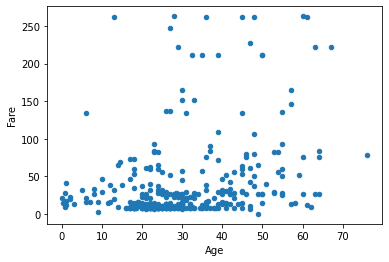

In [54]:
#checking
df1.plot.scatter('Age', 'Fare')

In [55]:
df1['Age'].fillna(df1['Age'].mean(), inplace=True)
df1['Fare'].fillna(df1['Fare'].mean(), inplace=True)

In [56]:
df1.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [57]:
# dropping useless columns 
df1.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)

In [58]:
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [59]:
df1['Embarked'].fillna(df1['Embarked'].mode()[0], inplace=True)

In [60]:
#Converting the categorical features 'Sex' and 'Embarked' into numerical values 0 & 1
df1.Sex=df1.Sex.map({'female':0, 'male':1})
df1.Embarked=df1.Embarked.map({'S':0, 'C':1, 'Q':2})
df1.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,2
1,3,0,47.0,1,0,7.0000,0
2,2,1,62.0,0,0,9.6875,2
3,3,1,27.0,0,0,8.6625,0
4,3,0,22.0,1,1,12.2875,0


In [61]:
df1.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [62]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


In [63]:
df1.shape

(418, 7)

In [64]:
df1.Age = (df1.Age-min(df1.Age))/(max(df1.Age)-min(df1.Age))
df1.Fare = (df1.Fare-min(df1.Fare))/(max(df1.Fare)-min(df1.Fare))
df1.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,0.396975,0.447368,0.392344,0.130925,0.464115
std,0.841838,0.481622,0.166617,0.896760,0.981429,0.192864,0.685516
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.301068,0.000000,0.000000,0.030022,0.000000
50%,3.000000,1.000000,0.396975,0.000000,0.000000,0.054959,0.000000
75%,3.000000,1.000000,0.469207,1.000000,0.000000,0.119665,1.000000
max,3.000000,1.000000,1.000000,8.000000,9.000000,1.000000,2.000000


**Prediction**

In [65]:
# prediction = classifier_logr.predict(df1)
# prediction

In [66]:
# submission = pd.DataFrame({"PassengerId": test["PassengerId"],
                            # "Survived": prediction})
# submission.to_csv('submission.csv', index=False)